In [12]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
from pathlib import Path
from PIL import Image as im

%matplotlib inline
%pprint

Pretty printing has been turned ON


In [41]:
class camimage:
    
    rotation = 0
    normalization = 1
    pixsize = 55
    
    def __init__(self, angle, listoflists):
        self.angle = angle
        self.listoflists = listoflists
        
    def get_name(self): return (str(self.angle) + ' Degrees')
    def get_xpixct(self): return (len(self.listoflists[0]))
    def get_ypixct(self): return (len(self.listoflists))
    def get_pixct(self): return (self.get_xpixct() * self.get_ypixct())
    def get_dim(self): return str(self.get_xpixct()*self.pixsize) + ' um x ' + str(self.get_ypixct()*self.pixsize) + ' mm'
    def get_res(self): return (self.get_xpixct(),self.get_ypixct())
    def get_rot(self): return self.rotation
    def get_norm(self): return self.normalization
    def get_pixsize(self): return str(self.pixsize) + ' um'
    def get_base_nparray(self): return np.array(self.listoflists, dtype=np.uint8)
    def get_nparray(self): return np.rot90((self.get_base_nparray()*(int(255 / self.get_norm()))), int(self.get_rot()/90), (-1,0)) 

    def get_maxcounts(self):
        maxcount = 0
        xylist = self.listoflists
        for x in range(len(xylist)):
            for y in range(len(xylist[0])):
                if xylist[x][y] > maxcount:
                    maxcount = xylist[x][y]
        return maxcount
        
    def set_pixsize(self, dim): self.pixsize = dim 
    def set_norm(self, const): self.normalization = const
    def set_norm_to_max(self): self.normalization = self.get_maxcounts()
    def set_rot(self, n90): 
        if (n90 == 0 or n90 == 90 or n90 == 180 or n90 == 270): self.rotation = n90 
        else: return print('Error: Rotate must be set to 0, 90, 180, or 270 degrees')
    
    def pic(self):
        return im.fromarray(self.get_nparray())

In [42]:
def file_list(directory, ftype):
    allflist = sorted(os.listdir(directory))
    flistlen = len(allflist)
    flist = []
    for x in range(flistlen):
        if allflist[x].endswith(str(ftype)):
            flist.append(allflist[x])
    return flist

def txt_to_list(file):
    rows = []
    processedrows = []

    with open(file, 'r') as f:
        listofrows = f.read().split('\n')
        f.close()

    for i in range(len(listofrows)):
        rowcrawler = []
        rawrow = listofrows[i].split('\t')
        rowlength = len(rawrow)
        for j in range(rowlength):
            if rawrow[j] != '':
                rowcrawler.append(int(rawrow[j]))
        rows.append(rowcrawler)

    #rows is a list of lists, where each entry (i.e. rows[0] is a list reading pixels horizontally across camera
    #rows[5] is a list of each value of every pixel in the 6th row of the image
    #rows[x] has ditched the empty value at the end of each list. But there are 257 rows, not 256. So I need to check that
    #the last row is a real value and not junk

    for j in range(len(rows)):
        if bool(rows[j]):
            processedrows.append(rows[j])
        
    # For example, consider:
    #     1 2 3
    #     4 5 6
    #     7 8 9
    # as a 3x3 pixel camera image. processedrows[0] = [1, 2, 3], and processedrows[2] = [7, 8, 9]
    # processed processedrows[hz index][vt index] accesses that pixel, so processedrows[1][2] = 6
    
    return processedrows

def generate_camimage_set(directory, ftype):
    return

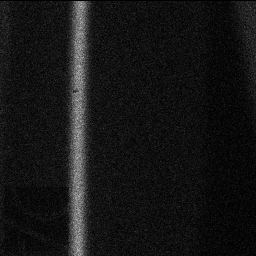

In [47]:
deg40 = txt_to_list('/Users/anthonygironda/Desktop/Rowland_Tracking/40_deg.txt')
p1 = camimage(40, deg40)
deg80 = txt_to_list('/Users/anthonygironda/Desktop/Rowland_Tracking/80_deg.txt')
p2 = camimage(80, deg80)

p1.pic()
p1.set_norm_to_max()
p1.set_rot(270)
p1.pic()

In [11]:
y = [[1,2,3],[4,5,6],[7,8,9]]
testy = camimage(50, y)
testy.pic()


TypeError: Cannot handle this data type: (1, 1), <i8

In [62]:
print(testy.get_name())
print(testy.get_xpixct())
print(testy.get_ypixct())
print(testy.get_pixct())
print(testy.get_dim())
print(testy.get_res())
print(testy.get_rot())
print(testy.get_norm())
print(testy.get_pixsize())
print(testy.get_maxcounts())


50 Degrees
5
3
15
275 um x 165 mm
(5, 3)
90
26
55 um
26


In [61]:
testy.set_norm(10)
testy.set_rot(90)
testy.set_pixsize(55)
testy.set_norm_to_max()

In [23]:
deg40 = txt_to_list('/Users/anthonygironda/Desktop/Rowland_Tracking/40_deg.txt')
p1 = camimage(40, deg40)
deg80 = txt_to_list('/Users/anthonygironda/Desktop/Rowland_Tracking/80_deg.txt')
p2 = camimage(80, deg80)

p1.picture()

AttributeError: 'camimage' object has no attribute 'picture'

In [5]:
#intrinsic instantiaion properties
print(p2.angle)
#print(p2.listoflists)

#calculated properties
print(p2.get_name)
print(p2.get_nparray)
print(p2.get_xpixct)
print(p2.get_ypixct)
print(p2.get_dim)
print(p2.get_res)
print(p2.get_pixct)

#reading attributes
print(p2.rotation)
print(p2.normalization)
print(p2.get_pixsize)

80
80 Degrees


AttributeError: 'camimage' object has no attribute 'get_nparray'

In [70]:
p2.set_rotation(-270)
p2.rotation
p1.rotation

0

In [11]:
test = [[0,2,3],[4,0,6],[7,8,0]]
t1 = camimage(100, test)
t1.normalize()
t1.rotation = 1
#t1.rotation
t2.rotation

NameError: name 't2' is not defined

In [12]:
test = [[0,2,3],[4,0,6],[7,8,0]]
t1 = camimage(100, test)

print(t1.listoflists)
t2 = t1.rotate(90)
t3 = t2.rotate(90)
t4 = t3.rotate(90)
t5 = t4.rotate(90)

print('\n')
print(t2.listoflists)
print('\n')
print(t3.listoflists)
print('\n')
print(t4.listoflists)
print('\n')
print(t5.listoflists)

#print(t1.rotate(90))

[[0, 2, 3], [4, 0, 6], [7, 8, 0]]


AttributeError: 'camimage' object has no attribute 'rotate'

In [91]:
t3.img()

In [109]:
deg40 = txt_to_list('/Users/anthonygironda/Desktop/Rowland_Tracking/83_deg.txt')
p1 = camimage(80, deg40)
p1.img()
p1.rotate(90)
p1.img()
# im.fromarray(p1.p1.rotate(90)imagearray)
img = p1.img()
img.resize(size=(700, 700))
p1.normalize()


371

In [143]:
       self.name = str(angle) + ' Degrees'
        self.angle = angle
        self.listoflists = listoflists
        self.imgarray = np.array(listoflists, dtype=np.uint8)
        self.xpixct = len(listoflists[0])
        self.ypixct = len(listoflists)
        self.dim = (len(listoflists[0]), len(listoflists))
        self.resolution = str(self.xpixct) + 'x' + str(self.ypixct)
        self.pixels = self.pixct*self.ypixct
        self.ftype = str(ftype)

IndentationError: unexpected indent (786360885.py, line 2)

In [144]:
p1.res

'256x256'

In [115]:
p1.name
p1.angle
p1.listoflists
#p1.imgarray
p1.xpixct
p1.ypixct
#p1.dim
p1.resolution
p1.pixels
p1.ftype


'txt'

In [21]:
deg40 = txt_to_list('/Users/anthonygironda/Desktop/Rowland_Tracking/40_deg.txt')
picture1 = camimage(40, deg40)
# adjpic = rotate(picture1, 90)
im.fromarray(picture1.imagearray)

#pic2=picture1.rotate(90)
#im.fromarray(pic2.imagearray)
#im.fromarray(picture1.rotate(90))

AttributeError: 'camimage' object has no attribute 'imagearray'

In [48]:

deg35 = txt_to_list('/Users/anthonygironda/Desktop/Rowland_Tracking/83_deg.txt')
array = np.array(deg35, dtype=np.uint8)
print(get_xy_length(deg35))
#im.fromarray(array)

None


In [39]:
array = np.array(deg35, dtype=np.uint8)
#im.fromarray(array)


In [447]:
deg35[74]

[4, 4, 4, 6, 2, 4, 4, 2, 5, 6, 0, 3, 4, 2, 4, 4, 6, 11, 4, 5, 4, 3, 4, 1, 6, 7, 7, 12, 2, 5, 6, 4, 4, 2, 4, 4, 4, 5, 3, 1, 3, 6, 1, 3, 6, 5, 4, 4, 5, 1, 2, 6, 6, 5, 5, 8, 6, 4, 5, 3, 3, 7, 3, 5, 6, 4, 10, 2, 2, 2, 2, 4, 2, 3, 4, 6, 3, 2, 3, 5, 3, 8, 5, 6, 6, 8, 4, 3, 2, 5, 4, 3, 4, 5, 8, 6, 3, 4, 3, 6, 2, 7, 5, 8, 2, 9, 4, 6, 11, 2, 9, 6, 6, 7, 5, 8, 9, 6, 9, 7, 8, 12, 12, 8, 10, 9, 13, 11, 23, 39, 60, 78, 76, 74, 109, 104, 141, 133, 142, 146, 126, 171, 187, 231, 208, 220, 207, 215, 213, 222, 217, 224, 234, 236, 263, 238, 233, 219, 254, 271, 256, 220, 237, 119, 60, 154, 247, 226, 231, 253, 230, 272, 224, 277, 256, 224, 270, 268, 259, 262, 261, 272, 254, 256, 290, 221, 217, 227, 210, 223, 178, 159, 183, 140, 129, 134, 112, 104, 76, 80, 74, 54, 50, 25, 24, 21, 14, 11, 11, 14, 10, 8, 14, 8, 7, 12, 14, 4, 14, 8, 6, 17, 9, 10, 9, 11, 6, 8, 15, 6, 11, 12, 8, 11, 9, 11, 5, 3, 12, 9, 8, 8, 12, 14, 7, 11, 11, 8, 7, 0, 7, 7, 5, 9, 8, 0]

In [351]:
direc = '/Users/anthonygironda/Desktop/Rowland_Tracking/'
dtype = 'txt'
angle = 50
file = direc + str(angle) + '_deg.' + dtype
print(file)
file_list(direc, dtype)
#txt_to_list(
directory = '/Users/anthonygironda/Desktop/Rowland_Tracking/'
datatype = 'txt'
files = filelist(directory, datatype)
numfiles = len(files)

/Users/anthonygironda/Desktop/Rowland_Tracking/50_deg.txt


['35_deg.txt',
 '36_deg.txt',
 '37_deg.txt',
 '38_deg.txt',
 '39_deg.txt',
 '40_deg.txt',
 '41_deg.txt',
 '42_deg.txt',
 '43_deg.txt',
 '44_deg.txt',
 '45_deg.txt',
 '46_deg.txt',
 '47_deg.txt',
 '48_deg.txt',
 '49_deg.txt',
 '50_deg.txt',
 '52_deg.txt',
 '55_deg.txt',
 '58_deg.txt',
 '60_deg.txt',
 '62_deg.txt',
 '65_deg.txt',
 '68_deg.txt',
 '70_deg.txt',
 '71_deg.txt',
 '72_deg.txt',
 '73_deg.txt',
 '74_deg.txt',
 '75_deg.txt',
 '76_deg.txt',
 '77_deg.txt',
 '78_deg.txt',
 '79_deg.txt',
 '80_deg.txt',
 '81_deg.txt',
 '82_deg.txt',
 '83_deg.txt']